In [13]:
from pynq import PL
PL.reset() #important fixes caching issues which have popped up.
from pynq import Overlay  #import the overlay module
ol = Overlay('./design_1.bit')  #locate/point to the bit file
import pprint
pprint.pprint(ol.ip_dict)
dma_0 = ol.axi_dma_0 #might need to change name depending on what you called it
dma_1 = ol.axi_dma_1
from pynq import Clocks
Clocks.pl_clk0_mhz = 150
print(Clocks.pl_clk0_mhz)


{'axi_dma_0': {'addr_range': 65536,
               'bdtype': None,
               'device': <pynq.pl_server.embedded_device.EmbeddedDevice object at 0xffffa2c0ffd0>,
               'driver': <class 'pynq.lib.dma.DMA'>,
               'fullpath': 'axi_dma_0',
               'gpio': {},
               'interrupts': {},
               'mem_id': 'S_AXI_LITE',
               'memtype': 'REGISTER',
               'parameters': {'ADDR_WIDTH': '10',
                              'ARUSER_WIDTH': '0',
                              'AWUSER_WIDTH': '0',
                              'BUSER_WIDTH': '0',
                              'CLK_DOMAIN': 'design_1_zynq_ultra_ps_e_0_1_pl_clk0',
                              'C_BASEADDR': '0xA0000000',
                              'C_DLYTMR_RESOLUTION': '125',
                              'C_ENABLE_MULTI_CHANNEL': '0',
                              'C_FAMILY': 'zynquplus',
                              'C_HIGHADDR': '0xA000FFFF',
                          

                                                                   'description': 'Scatter '
                                                                                  'Gather '
                                                                                  'Engine '
                                                                                  'Included. '
                                                                                  'DMASR.SGIncld '
                                                                                  '= '
                                                                                  '1 '
                                                                                  'indicates '
                                                                                  'the '
                                                                                  'Scatter '
                                                                              

                                                                                'progress. '
                                                                                'Normal '
                                                                                'operation.      '
                                                                                '1 '
                                                                                '- '
                                                                                'Reset '
                                                                                'in '
                                                                                'progress\n'}},
                                            'size': 32},
                             'S2MM_DMASR': {'access': 'read-write',
                                            'address_offset': 52,
                                            'description': 'S2MM DMA Status '
        

                                      'PSU__I2C0__PERIPHERAL__IO': 'MIO 18 .. '
                                                                   '19',
                                      'PSU__I2C1__GRP_INT__ENABLE': '0',
                                      'PSU__I2C1__GRP_INT__IO': '<Select>',
                                      'PSU__I2C1__PERIPHERAL__ENABLE': '1',
                                      'PSU__I2C1__PERIPHERAL__IO': 'MIO 36 .. '
                                                                   '37',
                                      'PSU__IOU_SLCR__IOU_TTC_APB_CLK__TTC0_SEL': 'APB',
                                      'PSU__IOU_SLCR__IOU_TTC_APB_CLK__TTC1_SEL': 'APB',
                                      'PSU__IOU_SLCR__IOU_TTC_APB_CLK__TTC2_SEL': 'APB',
                                      'PSU__IOU_SLCR__IOU_TTC_APB_CLK__TTC3_SEL': 'APB',
                                      'PSU__IOU_SLCR__TTC0__ACT_FREQMHZ': '100',
                                

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from pynq import allocate

In [36]:
config = allocate(1, dtype=np.uint32)
config[0] = 0 # default is fft normal?
data = allocate(8192, dtype=np.uint32)
for i in range(8192):
    data[i] = 0x00007FFF
fft_data = allocate(8192, dtype=np.uint32)
dma_1.sendchannel.transfer(config)
dma_1.sendchannel.wait()
dma_0.sendchannel.transfer(data)
dma_0.sendchannel.wait()
dma_0.recvchannel.transfer(fft_data)
dma_0.recvchannel.wait()

In [37]:
def get_decimal_from_twos(twos, num_bits):
    if twos & (1<<num_bits):
        return twos - (1<<(num_bits-1))
    else:
        return twos

In [38]:
def get_components(complex_array):
    return {
        'real': [get_decimal_from_twos(x // (1<<16), 16) for x in complex_array],
        'imag': [get_decimal_from_twos(x % (1<<16), 16) for x in complex_array]
    }

In [39]:
print(fft_data[0])

57344


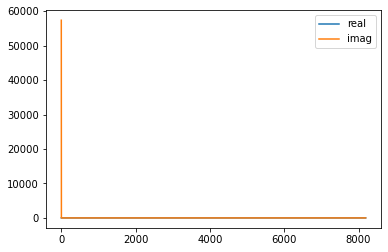

In [40]:
components = get_components(fft_data)
plt.plot(list(range(8192)), components['real'], label='real')
plt.plot(list(range(8192)), components['imag'], label='imag')
plt.legend()